In this notebook, we will generate some fake data and use it to illustrate some basic ideas about overfitting and cross validation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, let's make some fake data.

**Exercise** Form small groups and make sure that you have a working Jupyter notebook. Generate and make a scatter plot of `x_data` and `y_data`, which are related according to the equation $y = \sin(x)$ with some added noise, where $0 \leq x \leq 2\pi$. The functions `np.random.rand()` and/or `np.random.randn()` may be useful. Choose some reasonable parameters `(n, noise_amp)` for the number of data points and noise amplitude.

Text(0, 0.5, 'y')

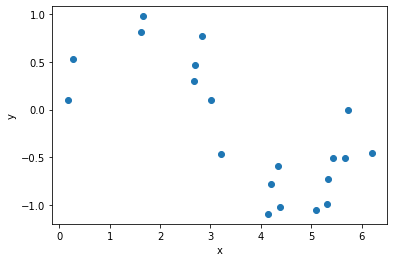

In [2]:
## Solution ##



## A linear fit

We'll use a built-in function to fit the data. Soon we will learn how to do this ourselves from scratch.

In [3]:
# A linear fit.

fit = np.polyfit(x_data, y_data, 1)  # read the documentation
beta1, beta0 = fit
print('slope: ', beta1)
print('intercept: ', beta0)

beta:  -0.2640273423029528
alpha:  0.7692373909617175


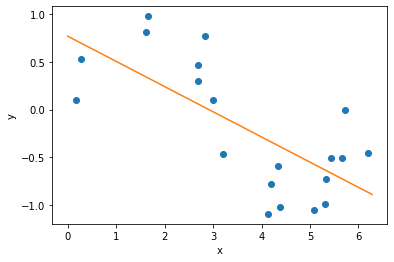

In [4]:
# Plot the data together with the fit.

x_pts = np.arange(0,2*np.pi,0.01)
y_fit = beta0 + beta1*x_pts

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)

## A polynomial fit

In [5]:
# A polynomial fit.

fit = np.polyfit(x_data, y_data, 2)
beta2, beta1, beta0 = fit
print(fit)


[ 0.00225913 -0.27870147  0.7856126 ]


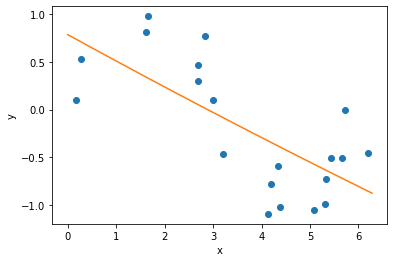

In [6]:
# Plot the data together with the fit.

x_pts = np.arange(0,2*np.pi,0.01)
y_fit = beta0 + beta1*x_pts + beta2*x_pts**2

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)

# A higher-order polynomial fit

In [7]:
# A polynomial fit.

p = 12
fit = np.polyfit(x_data, y_data, p)
beta_list = fit[::-1]  # flip the list so that it starts with beta0
print(beta_list)


[-1.49430913e+02  1.89426130e+03 -8.25074174e+03  1.62433837e+04
 -1.79439638e+04  1.24237149e+04 -5.71266134e+03  1.79381797e+03
 -3.86987213e+02  5.64820688e+01 -5.33246091e+00  2.94029401e-01
 -7.19280561e-03]


**Exercise:** Write a function `yhat(x, beta_list)` that, given an `x` value and a list of polynomial coefficients, returns the y value of the fitting function.

In [8]:
## Solution ##



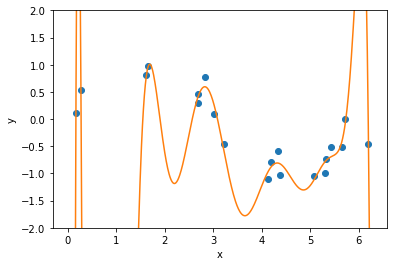

In [9]:
# Plot the data together with the fit.

x_pts = np.arange(0,2*np.pi,0.01)
y_fit = yhat(x_pts, beta_list)

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)
plt.ylim(-2,2);

# Testing the fit with new data

The above result looks like a very good fit! However, it won't do so well if we apply it to new data that wasn't used to fit the model.

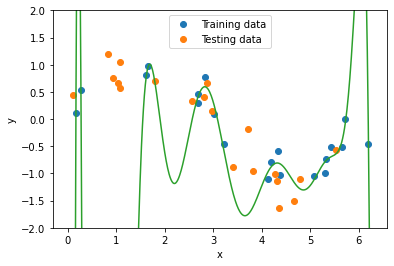

In [10]:
# Make some new simulated data, generated just like the data above:
x_new = 2*np.pi*np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_new = np.sin(x_new) + noise

# Reproduce the last plot, now also plotting the new data:
x_pts = np.arange(0,2*np.pi,0.01)
y_fit = yhat(x_pts, beta_list)

plt.plot(x_data, y_data, 'o')
plt.plot(x_new, y_new, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_pts, y_fit)
plt.legend(['Training data', 'Testing data'])
plt.ylim(-2,2);

It looks like the curve fits the training data well but fits the testing data poorly. In the homework, we'll quantify this difference and use it to select a good model.